# Importing necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading the dataset

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Detecting and removing duplicates

In [3]:
df.duplicated().sum()

31994

In [4]:
df.drop_duplicates(inplace = True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Finding Null Values

In [5]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


## Eliminating Null Values from Children Column

In [6]:
df.children.unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In [7]:
df["children"].replace(np.nan, 0, inplace=True)

## Eliminating Null Values from Country Column

In [8]:
df['country'] = df['country'].bfill()


In [9]:
df.country.isna().sum()

0

## Eliminating Null Values from Agent Column

In [10]:
df['agent'].replace(np.nan,df.agent.mean(), inplace=True)

In [11]:
df.agent.isna().sum()

0

In [12]:
(df.isna().sum()/len(df))*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

## Dropping Company Column as there are 93% Null Values

In [13]:
df1 = df.dropna(axis =1)
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,94.138306,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,94.138306,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,94.138306,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Checking for duplicates and eliminating them

In [14]:
df1.duplicated().sum()

26

In [15]:
df2 = df1.drop_duplicates()

In [16]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,94.138306,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,94.138306,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,94.138306,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [17]:
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000,87370.000000
mean,0.274980,79.906673,2016.210335,26.839029,15.815349,1.005437,2.625741,1.875964,0.138675,0.010828,0.039087,0.030422,0.184045,0.271672,94.131258,0.749788,106.347532,0.084251,0.698638
std,0.446507,86.052222,0.686101,13.673163,8.834886,1.031969,2.053701,0.626466,0.455933,0.113613,0.193802,0.369200,1.732148,0.727335,105.004052,10.017213,55.003646,0.281571,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


## After analysing few outiler values are found which have been elimnated

In [18]:
df2 = df2[df2.adr<600]
df2= df2[df2.lead_time<500]
df2= df2[df2.stays_in_week_nights<40]
df2= df2[df2.adults<20]
df2= df2[df2.previous_cancellations<15]
df2= df2[df2.booking_changes<15]
df2= df2[df2.days_in_waiting_list<140]
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,94.138306,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,94.138306,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,94.138306,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [19]:
df2.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000,87131.000000
mean,0.274587,79.107505,2016.210557,26.832907,15.816495,1.004832,2.622201,1.872261,0.138998,0.010857,0.039182,0.028624,0.184538,0.269537,94.198489,0.448773,106.383260,0.084471,0.699877
std,0.446308,84.463472,0.686402,13.673641,8.835802,1.022691,2.025159,0.511637,0.456455,0.113768,0.194030,0.303743,1.734494,0.703738,105.022675,5.734633,52.019714,0.281906,0.832126
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.160000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,98.210000,0.000000,0.000000
75%,1.000000,124.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,496.000000,2017.000000,53.000000,31.000000,14.000000,34.000000,10.000000,10.000000,10.000000,1.000000,14.000000,72.000000,14.000000,535.000000,125.000000,510.000000,8.000000,5.000000


## Correlation

In [20]:
df2.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.184069,0.088207,0.001431,0.005359,0.061917,0.085354,0.087965,0.067802,-0.020515,-0.089784,0.052760,-0.052174,-0.095105,-0.041439,0.007166,0.134924,-0.184353,-0.119769
lead_time,0.184069,1.000000,0.141728,0.101575,0.009511,0.243424,0.319957,0.153592,0.031839,-0.002802,-0.148282,-0.003719,-0.079556,0.078401,0.023996,0.089891,0.032665,-0.085571,0.040423
arrival_date_year,0.088207,0.141728,1.000000,-0.514209,-0.010373,0.005843,0.004880,0.061162,0.041135,-0.023396,0.024402,-0.055166,0.027247,0.009553,-0.018652,-0.036914,0.186402,-0.039959,0.064081
arrival_date_week_number,0.001431,0.101575,-0.514209,1.000000,0.093346,0.027115,0.028608,0.023158,0.013541,0.014321,-0.036851,0.004954,-0.020811,0.012538,0.015382,0.014849,0.105631,0.009030,0.046880
arrival_date_day_of_month,0.005359,0.009511,-0.010373,0.093346,1.000000,-0.017243,-0.027802,0.002924,0.015883,-0.000404,-0.004161,-0.005775,0.000149,0.006325,0.007676,0.016560,0.022307,0.009094,-0.001813
stays_in_weekend_nights,0.061917,0.243424,0.005843,0.027115,-0.017243,1.000000,0.545796,0.107189,0.028974,0.013852,-0.107956,-0.024793,-0.057324,0.040322,0.117357,-0.029650,0.044096,-0.043215,0.031361
stays_in_week_nights,0.085354,0.319957,0.004880,0.028608,-0.027802,0.545796,1.000000,0.118278,0.031493,0.016409,-0.114998,-0.024680,-0.059402,0.072289,0.154026,0.003189,0.060297,-0.044517,0.037162
adults,0.087965,0.153592,0.061162,0.023158,0.002924,0.107189,0.118278,1.000000,0.031160,0.021066,-0.209246,-0.063692,-0.147540,-0.056039,-0.034917,-0.032804,0.337753,0.011630,0.144375
children,0.067802,0.031839,0.041135,0.013541,0.015883,0.028974,0.031493,0.031160,1.000000,0.017351,-0.045814,-0.021578,-0.029514,0.032072,0.026878,-0.022024,0.345414,0.036121,0.044231
babies,-0.020515,-0.002802,-0.023396,0.014321,-0.000404,0.013852,0.016409,0.021066,0.017351,1.000000,-0.013033,-0.006004,-0.009223,0.084150,0.032561,-0.006958,0.024749,0.030808,0.094795


<AxesSubplot:>

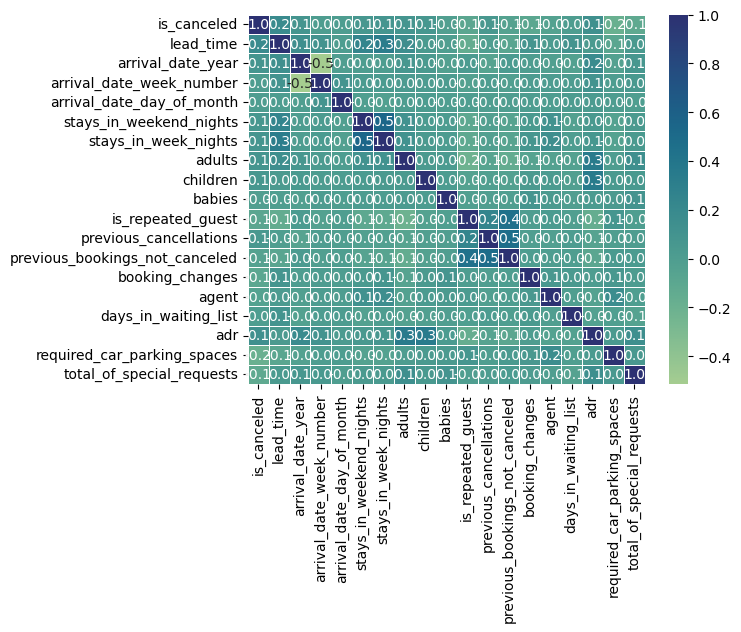

In [21]:
sns.heatmap(df2.corr(),annot=True, fmt=".1f",linewidth=0.7,cmap = 'crest')

## From above HeatMap we can see that the above data is not correlated

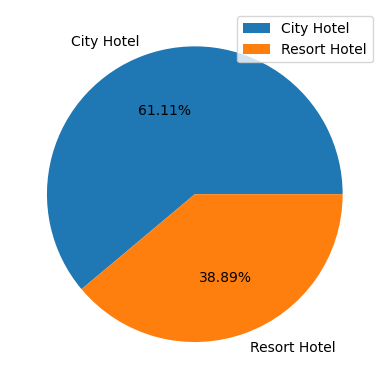

In [22]:
temp = df2.groupby('hotel').size()
fig = plt.pie(temp.values, labels=temp.index, autopct='%1.2f%%')
plt.legend()
plt.show()

## More people prefer City Hotel

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

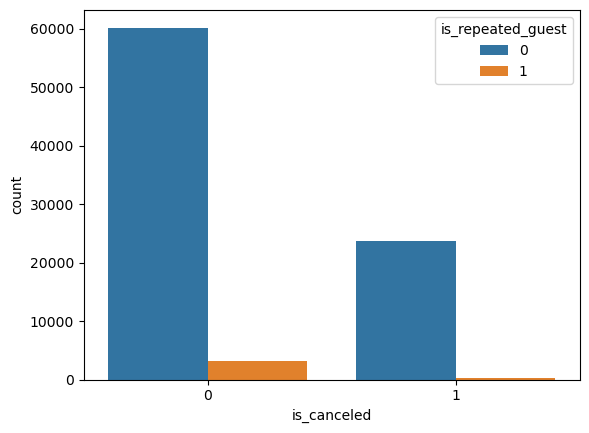

In [23]:
sns.countplot(data=df, x = 'is_canceled', hue='is_repeated_guest')

## Repeated guests have min.cancelled bookings

<AxesSubplot:xlabel='hotel', ylabel='count'>

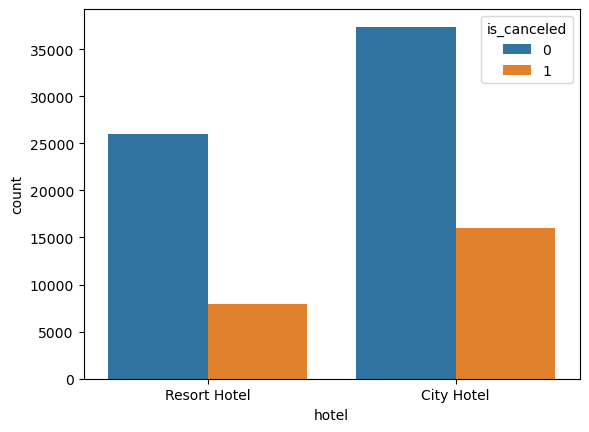

In [24]:
sns.countplot(data=df, x = 'hotel', hue='is_canceled')

## City Hotel has maximum cancelled bookings

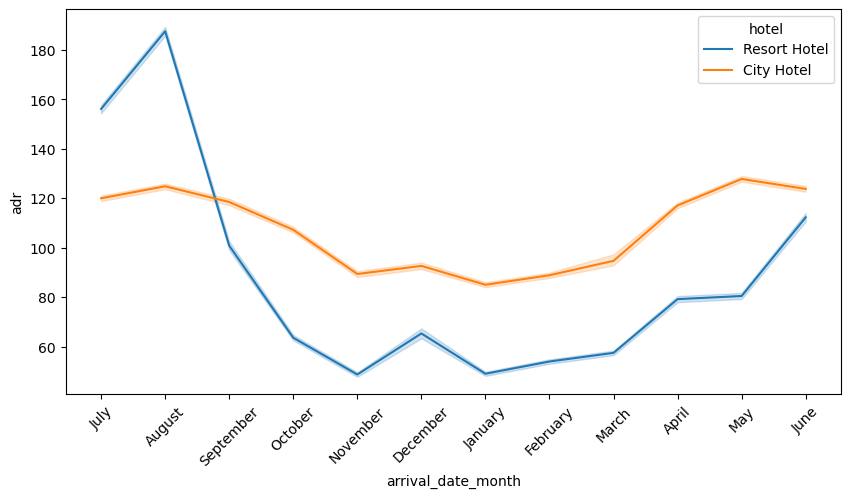

In [25]:
fig = plt.figure(figsize=(10,5),dpi=100)

sns.lineplot(data=df, x= 'arrival_date_month', y = 'adr', hue='hotel',)
plt.xticks(rotation=45,fontsize=10);

## City Hotel has higher prices. August which was the crowdest month

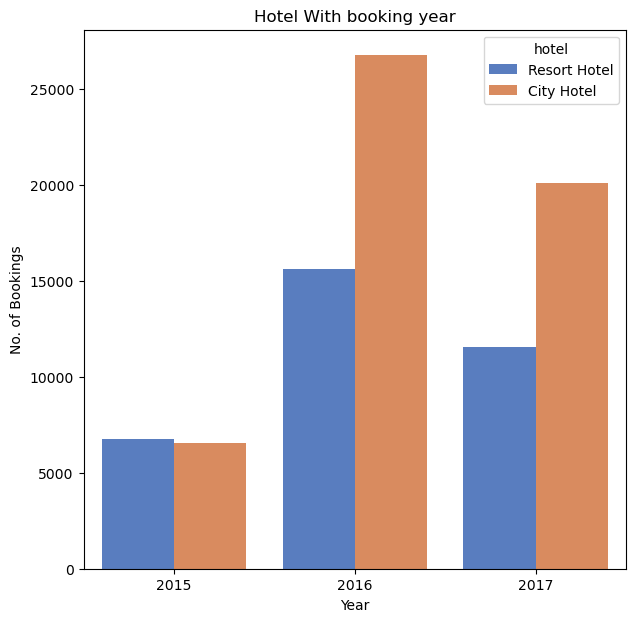

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(x='arrival_date_year',data=df,hue='hotel',palette="muted")
plt.xlabel('Year')
plt.ylabel('No. of Bookings')
plt.title('Hotel With booking year')
plt.show()

## 2016 is the year with maximum bookings and City Hotel has max bookings

In [27]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,94.138306,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,94.138306,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.000000,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.000000,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,94.138306,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,No Deposit,394.000000,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,No Deposit,9.000000,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,No Deposit,9.000000,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,No Deposit,89.000000,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [28]:
l1=list(df2.columns)

In [29]:
list2=[]

for i in l1:
    if df2[i].dtype=='object':
        list2.append(i)

In [30]:
le=LabelEncoder()

In [31]:
for i in list2:
    df2[i]=le.fit_transform(df2[i])

In [32]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,5,27,1,0,0,2,...,3,0,94.138306,0,2,0.00,0,0,1,120
2,1,0,7,2015,5,27,1,0,1,1,...,0,0,94.138306,0,2,75.00,0,0,1,121
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,304.000000,0,2,75.00,0,0,1,121
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,240.000000,0,2,98.00,0,1,1,122
6,1,0,0,2015,5,27,1,0,2,2,...,0,0,94.138306,0,2,107.00,0,0,1,122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,0,0,394.000000,0,2,96.14,0,0,1,918
119386,0,0,102,2017,1,35,31,2,5,3,...,0,0,9.000000,0,2,225.43,0,2,1,919
119387,0,0,34,2017,1,35,31,2,5,2,...,0,0,9.000000,0,2,157.71,0,4,1,919
119388,0,0,109,2017,1,35,31,2,5,2,...,0,0,89.000000,0,2,104.40,0,0,1,919


In [33]:
x = df2[['hotel', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']]
y = df2['is_canceled']

x_train,x_test,y_train,y_test = train_test_split(x, y, train_size=0.60,random_state=10)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
LogReg = LogisticRegression(random_state=10,max_iter=200)
LogReg.fit(x_train,y_train) 

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=10)

In [36]:
LogReg.score(x_test,y_test)

0.891200183628382

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
#knn.score(x_test,y_test)

In [39]:
from sklearn.tree import DecisionTreeClassifier

DecTree = DecisionTreeClassifier(ccp_alpha=0.2,max_depth=6,random_state=100)

DecTree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.2, max_depth=6, random_state=100)

In [40]:
DecTree.score(x_test,y_test)


0.988810145468109

In [41]:
from sklearn.ensemble import RandomForestClassifier

RanForest = RandomForestClassifier(n_estimators=10,random_state=200)

RanForest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=200)

In [42]:
RanForest.score(x_test,y_test)

0.9981637161793819

In [43]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost = AdaBoostClassifier(base_estimator=DecTree,learning_rate=0.8,n_estimators=100,random_state=200)
AdaBoost.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.2,
                                                         max_depth=6,
                                                         random_state=100),
                   learning_rate=0.8, n_estimators=100, random_state=200)

In [44]:
AdaBoost.score(x_test,y_test)

1.0

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

GBoost=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,ccp_alpha=0.2,max_depth=8)
GBoost.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.2, max_depth=8)

In [46]:
GBoost.score(x_test,y_test)

0.728143918744441

In [47]:
from xgboost import XGBClassifier

XGBoost=XGBClassifier(learning_rate=0.01,n_estimators=100,max_depth=8,colsample_bytree=0.3,colsample_bylevel=0.5)
XGBoost.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.3, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
XGBoost.score(x_test,y_test)

0.9836455972226207

In [49]:
from sklearn.ensemble import BaggingClassifier

model= BaggingClassifier(base_estimator=DecTree,n_estimators=200, max_samples=0.8,random_state=100,oob_score=True)

model.fit(x_train,y_train)



C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.2,
                                                        max_depth=6,
                                                        random_state=100),
                  max_samples=0.8, n_estimators=200, oob_score=True,
                  random_state=100)

In [50]:
model.score(x_test,y_test)

0.988810145468109

## From above analysis we can see that Random Forest Model is giving highest score of 0.99